In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('ITC.NS.csv', date_parser= True)

In [3]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1230,2021-12-06,221.649994,222.199997,217.500000,217.899994,217.899994,13138355
1231,2021-12-07,218.899994,221.949997,218.100006,220.649994,220.649994,8903842
1232,2021-12-08,221.000000,225.649994,221.000000,224.949997,224.949997,9861847
1233,2021-12-09,223.000000,236.449997,223.000000,235.399994,235.399994,38241864
1234,2021-12-10,236.199997,238.949997,233.750000,236.100006,236.100006,35162889


In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-13,234.800003,236.899994,232.199997,235.649994,202.040085,7440621
1,2016-12-14,236.000000,236.500000,232.000000,233.149994,199.896652,6313305
2,2016-12-15,232.000000,234.399994,228.500000,229.699997,196.938705,5332924
3,2016-12-16,230.800003,230.800003,226.000000,226.350006,194.066528,12925203
4,2016-12-19,225.350006,229.000000,225.350006,227.000000,194.623795,5455325
...,...,...,...,...,...,...,...
1230,2021-12-06,221.649994,222.199997,217.500000,217.899994,217.899994,13138355
1231,2021-12-07,218.899994,221.949997,218.100006,220.649994,220.649994,8903842
1232,2021-12-08,221.000000,225.649994,221.000000,224.949997,224.949997,9861847
1233,2021-12-09,223.000000,236.449997,223.000000,235.399994,235.399994,38241864


In [5]:
data_train= data[data['Date']<'2020-12-12'].copy()
data_val= data[data['Date']>='2020-02-24'].copy()

In [6]:
data_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-13,234.800003,236.899994,232.199997,235.649994,202.040085,7440621
1,2016-12-14,236.000000,236.500000,232.000000,233.149994,199.896652,6313305
2,2016-12-15,232.000000,234.399994,228.500000,229.699997,196.938705,5332924
3,2016-12-16,230.800003,230.800003,226.000000,226.350006,194.066528,12925203
4,2016-12-19,225.350006,229.000000,225.350006,227.000000,194.623795,5455325
...,...,...,...,...,...,...,...
984,2020-12-07,198.199997,203.750000,197.600006,203.149994,193.076630,35693450
985,2020-12-08,203.899994,204.699997,199.550003,202.449997,192.411346,30853963
986,2020-12-09,205.000000,207.800003,204.649994,205.399994,195.215073,39684395
987,2020-12-10,206.649994,213.649994,203.149994,212.699997,202.153091,65227495


In [7]:
data_test= data[data['Date']>='2020-12-12'].copy()

In [8]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
989,2020-12-14,217.949997,218.600006,215.000000,215.899994,205.194412,26990063
990,2020-12-15,215.250000,216.399994,211.600006,213.550003,202.960953,23255609
991,2020-12-16,213.750000,215.550003,213.500000,214.000000,203.388626,19551630
992,2020-12-17,214.199997,215.100006,211.250000,213.050003,202.485748,22386185
993,2020-12-18,213.100006,215.949997,209.750000,214.500000,203.863846,23775053
...,...,...,...,...,...,...,...
1230,2021-12-06,221.649994,222.199997,217.500000,217.899994,217.899994,13138355
1231,2021-12-07,218.899994,221.949997,218.100006,220.649994,220.649994,8903842
1232,2021-12-08,221.000000,225.649994,221.000000,224.949997,224.949997,9861847
1233,2021-12-09,223.000000,236.449997,223.000000,235.399994,235.399994,38241864


In [9]:
training_data= data_train.drop(['Date', 'Adj Close','High', 'Low', 'Close', 'Volume'], axis =1)
training_data
validation_data= data_val.drop(['Date', 'Adj Close','High', 'Low', 'Close', 'Volume'], axis =1)

In [10]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
validation_data = scaler.fit_transform(validation_data)

In [11]:
training_data

array([[0.43838385],
       [0.44444444],
       [0.42424242],
       [0.41818183],
       [0.3906566 ],
       [0.40656566],
       [0.40909091],
       [0.39015152],
       [0.40151515],
       [0.38838381],
       [0.39393939],
       [0.42777776],
       [0.44090911],
       [0.45176766],
       [0.47474747],
       [0.46919189],
       [0.47904043],
       [0.48737374],
       [0.5       ],
       [0.47904043],
       [0.49494949],
       [0.51414143],
       [0.50353534],
       [0.49494949],
       [0.51136364],
       [0.50909092],
       [0.52323235],
       [0.51388889],
       [0.53661616],
       [0.54090912],
       [0.56363639],
       [0.5654041 ],
       [0.58333333],
       [0.55757573],
       [0.54646471],
       [0.56565657],
       [0.62121212],
       [0.63636364],
       [0.64090906],
       [0.65959599],
       [0.64393939],
       [0.64646465],
       [0.66010107],
       [0.64343431],
       [0.61616162],
       [0.62222228],
       [0.61641408],
       [0.602

In [12]:
X_train =[]
y_train= []
X_val=[]
y_val=[]

In [13]:
for i in range(50,validation_data.shape[0]):
    X_val.append(validation_data[i-50:i])
    y_val.append(validation_data[i,0])

In [14]:
for i in range(50,training_data.shape[0]):
    X_train.append(training_data[i-50:i])
    y_train.append(training_data[i,0])

In [15]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val= np.array(X_val), np.array(y_val)

In [16]:
X_train.shape, y_train.shape

((939, 50, 1), (939,))

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [20]:
regressor = Sequential()
regressor.add(LSTM(units = 96,  return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 96,  return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 96, return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 96))
regressor.add(Dropout(0.2))


regressor.add(Dense(units=1))


               
        

In [21]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 96)            37632     
                                                                 
 dropout_4 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_5 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_6 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_6 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_7 (LSTM)               (None, 96)               

In [22]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = regressor.fit(X_train, y_train, batch_size = 32, 
                    epochs = 120, validation_data =(X_val, y_val), 
                    callbacks =[earlystopping])      
    

Epoch 1/120
30/30 [==============================] - 12s 217ms/step - loss: 0.0441 - val_loss: 0.0091
Epoch 2/120
30/30 [==============================] - 5s 172ms/step - loss: 0.0078 - val_loss: 0.0089
Epoch 3/120
30/30 [==============================] - 4s 118ms/step - loss: 0.0068 - val_loss: 0.0124
Epoch 4/120
30/30 [==============================] - 3s 100ms/step - loss: 0.0074 - val_loss: 0.0080
Epoch 5/120
30/30 [==============================] - 4s 131ms/step - loss: 0.0057 - val_loss: 0.0080
Epoch 6/120
30/30 [==============================] - 4s 122ms/step - loss: 0.0053 - val_loss: 0.0082
Epoch 7/120
30/30 [==============================] - 4s 121ms/step - loss: 0.0060 - val_loss: 0.0073
Epoch 8/120
30/30 [==============================] - 4s 121ms/step - loss: 0.0052 - val_loss: 0.0075
Epoch 9/120
30/30 [==============================] - 4s 125ms/step - loss: 0.0051 - val_loss: 0.0069
Epoch 10/120
30/30 [==============================] - 5s 186ms/step - loss: 0.0046 - val_l

In [29]:
past_50_days = data_train.tail(50)

In [30]:
df= past_50_days.append(data_test, ignore_index= True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-01,174.500000,174.600006,170.100006,170.850006,162.378265,19756417
1,2020-10-05,171.100006,172.800003,168.750000,169.250000,160.857590,24298942
2,2020-10-06,169.500000,171.600006,168.100006,169.899994,161.475357,21885190
3,2020-10-07,170.000000,170.899994,169.000000,169.500000,161.095200,16286540
4,2020-10-08,170.100006,170.399994,166.899994,167.149994,158.861725,25502126
...,...,...,...,...,...,...,...
291,2021-12-06,221.649994,222.199997,217.500000,217.899994,217.899994,13138355
292,2021-12-07,218.899994,221.949997,218.100006,220.649994,220.649994,8903842
293,2021-12-08,221.000000,225.649994,221.000000,224.949997,224.949997,9861847
294,2021-12-09,223.000000,236.449997,223.000000,235.399994,235.399994,38241864


In [31]:
df= df.drop(['Date', 'Adj Close','High', 'Low', 'Close', 'Volume'], axis=1)
df.head()

,Open
0,174.500000
1,171.100006
2,169.500000
3,170.000000
4,170.100006


In [32]:
inputs = scaler.transform(df)
inputs

array([[0.13383838],
       [0.1166667 ],
       [0.10858586],
       [0.11111111],
       [0.11161619],
       [0.09848485],
       [0.11363636],
       [0.12550508],
       [0.1138889 ],
       [0.09949493],
       [0.08838384],
       [0.09494951],
       [0.1010101 ],
       [0.10176765],
       [0.09873739],
       [0.10580807],
       [0.11868687],
       [0.10353535],
       [0.10353535],
       [0.08585859],
       [0.08080808],
       [0.09494951],
       [0.09696968],
       [0.11136365],
       [0.11742424],
       [0.14393939],
       [0.13106059],
       [0.13636364],
       [0.15959599],
       [0.18787877],
       [0.19797978],
       [0.20732325],
       [0.20707071],
       [0.19595961],
       [0.17575759],
       [0.20606062],
       [0.22222222],
       [0.21515155],
       [0.24242424],
       [0.23787882],
       [0.23459594],
       [0.23737374],
       [0.23737374],
       [0.24848483],
       [0.2467172 ],
       [0.25353534],
       [0.2823232 ],
       [0.287

In [33]:
X_test= []
y_test= []

In [34]:
for i in range(50, inputs.shape[0]):
    X_test.append(inputs[i-50:i])
    y_test.append(inputs[i,0])

In [35]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((246, 50, 1), (246,))

In [36]:
y_pred = regressor.predict(X_test)

In [37]:
scaler.scale_

array([0.00505051])

In [38]:
scale = 1/0.00505051

In [39]:
y_pred = y_pred*scale
y_test = y_test*scale

In [40]:
y_test

array([ 69.94992845,  67.2499341 ,  65.74993557,  66.19993212,
        65.0999422 ,  66.49993483,  55.099952  ,  54.9999461 ,
        61.99993924,  60.99994022,  62.49993875,  64.69993359,
        62.5499417 ,  61.89993334,  65.99993532,  64.44993384,
        63.44993482,  58.09994906,  56.34995078,  55.99994512,
        54.9999461 ,  59.44993874,  63.99993728,  66.89992844,
        70.39992501,  72.99992846,  70.49993091,  70.99993042,
        65.99993532,  63.99993728,  59.9999412 ,  61.24993998,
        60.54994366,  55.99994512,  71.99992944,  73.49992797,
        68.09993926,  84.14991153,  89.49991229,  86.59992113,
        80.99992062,  80.99992062,  77.74992381,  70.44992796,
        71.04993337,  69.59993779,  70.1999282 ,  70.84993657,
        63.99993728,  59.9999412 ,  61.09994612,  61.49993973,
        59.24994194,  57.4499407 ,  58.99994218,  63.99993728,
        60.79994342,  59.9999412 ,  61.69993653,  60.69993751,
        61.09994612,  59.9999412 ,  57.84994931,  58.39

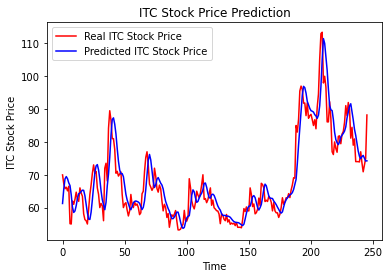

In [41]:
import matplotlib.pyplot as plt

plt.plot(y_test, color = 'red', label = 'Real ITC Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted ITC Stock Price')
plt.title('ITC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ITC Stock Price')
plt.legend()
plt.show()